In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('dataset/Zameen Property Data.csv')

from pre_poccess import pre_poccess
pp_data = pre_poccess(data)

145742


C:\Users\H square\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\H square\OneDrive - Habib University\semester7\DS\project\Zameen-Data-exploratory-Analysis\pre_poccess.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score
C:\Users\H square\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

date done
141985
pre-poccessed successfully.


In [3]:
pp_data.shape

(141985, 16)

In [4]:
pp_data.dtypes

property_type              object
price                       int64
location                   object
city                       object
province_name              object
latitude                  float64
longitude                 float64
baths                       int64
area                      float64
purpose                    object
bedrooms                    int64
date_added         datetime64[ns]
agency                     object
unique_location            object
price_per_area            float64
price_z_score             float64
dtype: object

In [96]:
pp_data['date_added'] = pp_data['date_added'].apply(pd.to_datetime, format='%m-%d-%Y')
pp_data.dtypes

property_type              object
price                       int64
location                   object
city                       object
province_name              object
latitude                  float64
longitude                 float64
baths                       int64
area                      float64
purpose                    object
bedrooms                    int64
date_added         datetime64[ns]
agency                     object
agent                      object
unique_location            object
price_per_area            float64
price_z_score             float64
dtype: object

In [4]:
pp_data.nunique()

property_type         7
price              1838
location           1469
city                  5
province_name         3
latitude           7382
longitude          7834
baths                16
area                295
purpose               2
bedrooms             20
date_added          124
agency             5441
unique_location    1549
price_per_area     9223
price_z_score      9694
dtype: int64

In [5]:
pp_data.describe()

,price,latitude,longitude,baths,area,bedrooms,price_per_area,price_z_score
count,1.419850e+05,141985.000000,141985.000000,141985.000000,141985.000000,141985.000000,1.419850e+05,141985.000000
mean,1.518015e+07,29.762628,71.217276,3.256090,2890.192344,3.607790,1.746261e+05,-0.112721
std,2.226996e+07,3.809042,3.180877,2.314938,2088.327201,1.567217,5.659156e+05,0.666758
min,1.000000e+00,11.052446,25.906027,0.000000,25.000000,1.000000,4.000000e-04,-0.395096
25%,2.500000e+05,24.945596,67.130384,2.000000,1500.000000,3.000000,1.888889e+03,-0.366894
50%,9.000000e+06,31.458942,73.056182,3.000000,2500.000000,3.000000,3.600000e+03,-0.365055
75%,1.920000e+07,33.550869,74.189715,5.000000,4250.000000,5.000000,5.500000e+03,-0.362552
max,7.500000e+08,73.184088,76.918917,403.000000,155555.000000,27.000000,3.294118e+06,2.996178


In [6]:
pp_data.isna().sum()

property_type      0
price              0
location           0
city               0
province_name      0
latitude           0
longitude          0
baths              0
area               0
purpose            0
bedrooms           0
date_added         0
agency             0
unique_location    0
price_per_area     0
price_z_score      0
dtype: int64

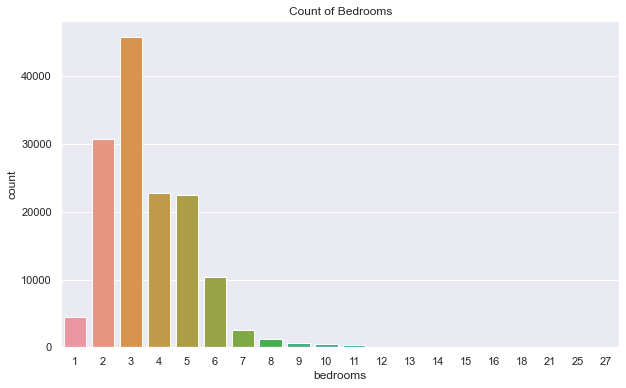

In [52]:
sns.set(font_scale=1)
# pp_data.bedrooms.value_counts().plot(kind='bar',figsize=(8,6))
# plt.xlabel('Number of bedrooms')
# plt.ylabel('Count')
# plt.title("Count of Bedrooms")
# plt.show()

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="bedrooms", data=pp_data).set_title('Count of Bedrooms')
plt.show()

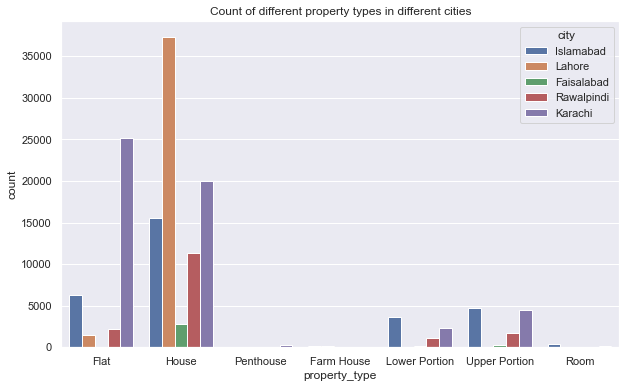

In [55]:
# pp_data.property_type.value_counts().plot(kind='bar',figsize=(8,6))
# plt.xlabel('Property type')
# plt.ylabel('Counts of different property types')
# plt.title("Count")
# plt.show()

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='property_type',data=pp_data,ax=ax,hue='city').set_title('Count of different property types in different cities')
plt.show()

In [29]:
cities = pp_data.city.unique().tolist()
for i in cities:
    print("Numer of houses ads for " + i+ " city:",len(pp_data[pp_data['city']==i].index))

Numer of houses ads for Islamabad city: 30702
Numer of houses ads for Lahore city: 39141
Numer of houses ads for Faisalabad city: 3220
Numer of houses ads for Rawalpindi city: 16492
Numer of houses ads for Karachi city: 52430


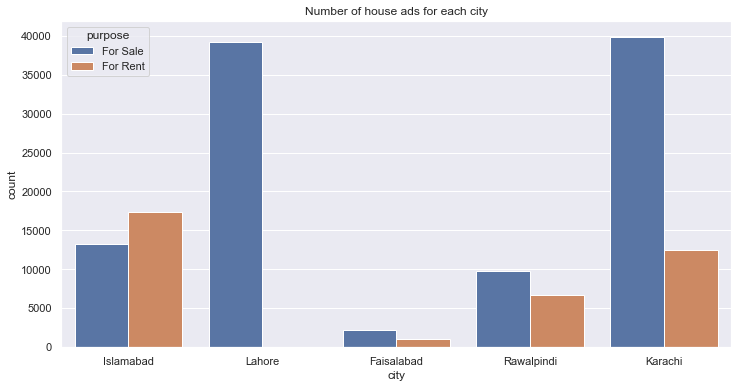

In [56]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="city", data=pp_data,hue='purpose').set_title('Number of house ads for each city')
plt.show()

In [36]:
for_sale = pp_data[pp_data['purpose'] == 'For Sale']
for_rent = pp_data[pp_data['purpose'] == 'For Rent']

print("Average Sales price for all countries in Rupees: ",int(for_sale.price.mean()))
print("Average Rent price for all countries in Rupees: ",int(for_rent.price.mean()))

Average Sales price for all countries in Rupees:  20613892
Average Rent price for all countries in Rupees:  82458


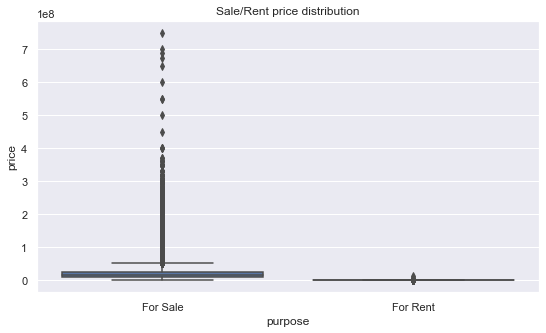

In [81]:
fig, ax = plt.subplots(figsize=(9,5))
sns.boxplot(x=pp_data.purpose,y=pp_data.price,ax=ax).set_title('Sale/Rent price distribution')
plt.show()

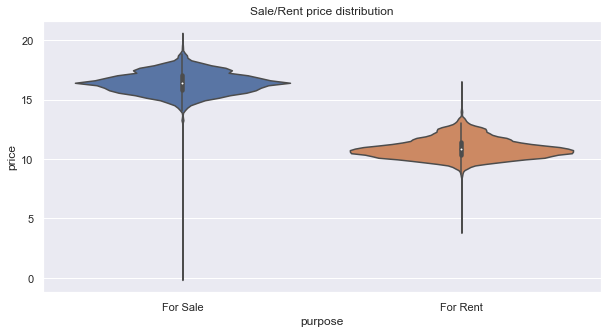

In [83]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x=pp_data.purpose,y=np.log(pp_data.price),ax=ax).set_title('Sale/Rent price distribution')
plt.show()

In [10]:
for i in cities:
    print("Average Sale Price for " +i+ " city: ",for_sale[for_sale['city'] == i].price.mean())

Average Sale Price for Islamabad city:  24033836.750093866
Average Sale Price for Lahore city:  23383576.50670652
Average Sale Price for Faisalabad city:  13578154.676258992
Average Sale Price for Rawalpindi city:  15209368.8170645
Average Sale Price for Karachi city:  18480130.664351445


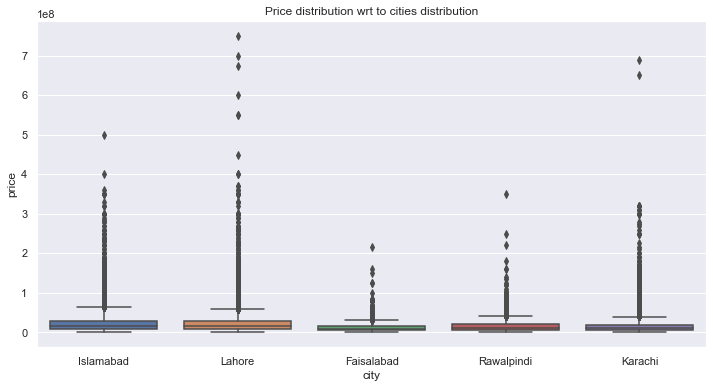

In [84]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x=for_sale.city,y=for_sale.price,ax=ax).set_title('Price distribution wrt to cities distribution')
plt.show()

In [11]:
for i in cities:
    print("Average Rent Price for " +i+ " city: ",for_rent[for_rent['city'] == i].price.mean())

Average Rent Price for Islamabad city:  93049.62807017544
Average Rent Price for Lahore city:  nan
Average Rent Price for Faisalabad city:  42617.55020080321
Average Rent Price for Rawalpindi city:  43710.200090266284
Average Rent Price for Karachi city:  91472.04558132122


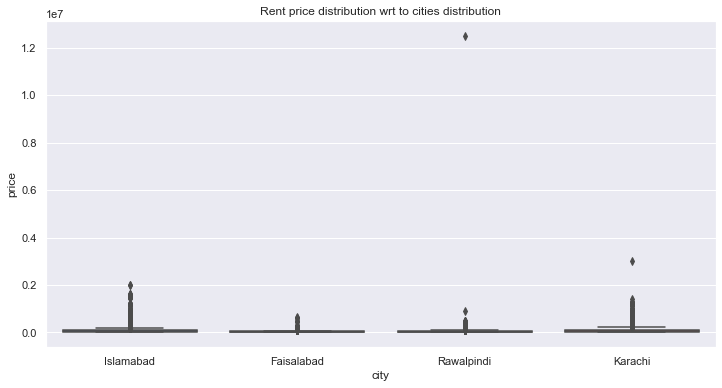

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x=for_rent.city,y=for_rent.price,ax=ax).set_title('Rent price distribution wrt to cities distribution')
plt.show()

In [25]:
print("Number of entries per year:")
pp_data['date_added'].dt.year.value_counts()

Number of entries per year:


2019    131120
2018     10865
Name: date_added, dtype: int64

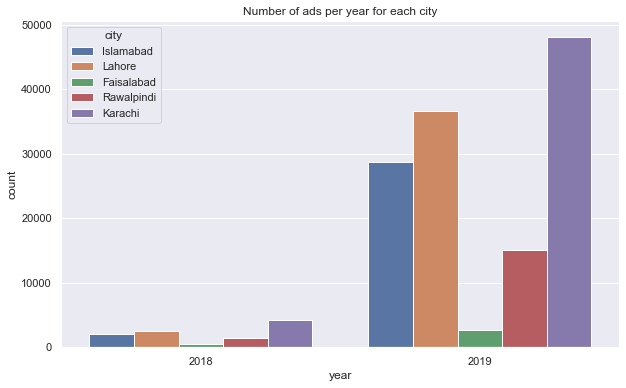

In [86]:
pp_data['year'] = pp_data['date_added'].dt.year
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="year", data=pp_data,hue="city").set_title('Number of ads per year for each city')
plt.show()

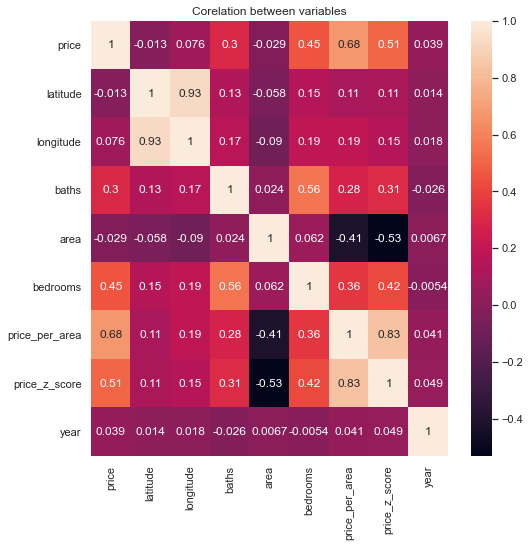

In [88]:
plt.figure(figsize=(8, 8))
sns.set(font_scale=1)
sns.heatmap(pp_data.corr(),annot=True).set_title('Corelation between variables')
plt.show()